# **Kelompok 4**

---

1. M. Yusuf
2. Gandis Ratna Cendani Karmana
3. Ganjar Arih Nurul Inas
4. Raden Roro Fara Diba
5. Rhena Yuni Junita

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
from nltk import tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## *Load Dataset*

In [ ]:
fake = pd.read_csv("/content/Fake - Fake (1).csv")
true = pd.read_csv("/content/True - True (1).csv")

In [ ]:
fake.shape, true.shape

((30, 4), (30, 4))

## *Preprocessing*

In [ ]:
# Membuat tanda untuk melacak fake dan real news
fake['target'] = 0
true['target'] = 1

In [ ]:
# Menggabungkan data frame
data = pd.concat([fake, true], ignore_index=True, sort=False)
data.head()

,title,text,subject,date,target
0,Menteri Sri Mulyani akan Jual Bali demi bayar ...,Sri Mulyani : Jika rakyat mengijinkan daerah b...,News,"Juli 4, 2017",0
1,Tarif Dasar Listrik Naik Lagi Awal Juli 2019,Seperti sebuah artikel dari situs klikshare.in...,News,"Juli 5, 2019",0
2,Pembagian Uang Rp3 Juta dalam Rangka\nUlang Ta...,Beredar pesan berantai di media sosial WhatsAp...,News,"Juli 6, 2021",0
3,Pesan Berantai Subsidi Listrik PT PLN (Persero...,Telah beredar informasi berantai yang disebar ...,News,"Juli 7, 2021",0
4,Awas Tipu-tipu! Lowongan Dokter Pribadi Kepala...,Badan Nasional Penanggulangan Bencana (BNPB) m...,News,"Juli 8, 2022",0


In [ ]:
# Mengacak data untuk mencegah bias
data = shuffle(data)
data = data.reset_index(drop=True)
data.head()

,title,text,subject,date,target
0,Ramadhan dan Lebaran 2022 Diramal Kerek PDB In...,Chief Economist Bank Mandiri Andry Asmoro memp...,Economy,"Mei 9, 2022",1
1,Ambil Bansos Tunai di Kantor Pos Harus Bawa Bu...,Beredar di media sosial sebuah foto undangan ...,News,"Agustus 6, 2021",0
2,Kemnaker Usung Penciptaan Lapangan Kerja di EW...,Kementerian Ketenagakerjaan (Kemnaker) akan me...,Economy,"Mei 10, 2022",1
3,Belanja Subsidi BBM dan LPG Melonjak Dua Kali ...,Menteri Keuangan Sri Mulyani mengungkapkan rea...,Economy,"April 20, 2022",1
4,Upah Buruh Dihitung Per-jam,Beredar informasi di media sosial Twitter yang...,News,"Oktober 14, 2020",0


In [ ]:
# Menghapus judul, subjek dan tanggal karena tidak dibutuhkan
data.drop(["title", "subject", "date"],axis=1,inplace=True)
data.head()

,text,target
0,Chief Economist Bank Mandiri Andry Asmoro memp...,1
1,Beredar di media sosial sebuah foto undangan ...,0
2,Kementerian Ketenagakerjaan (Kemnaker) akan me...,1
3,Menteri Keuangan Sri Mulyani mengungkapkan rea...,1
4,Beredar informasi di media sosial Twitter yang...,0


In [ ]:
# Mengubah ke huruf kecil
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,target
0,chief economist bank mandiri andry asmoro memp...,1
1,beredar di media sosial sebuah foto undangan ...,0
2,kementerian ketenagakerjaan (kemnaker) akan me...,1
3,menteri keuangan sri mulyani mengungkapkan rea...,1
4,beredar informasi di media sosial twitter yang...,0


In [ ]:
# Menghapus tanda baca
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)
data.head()

,text,target
0,chief economist bank mandiri andry asmoro memp...,1
1,beredar di media sosial sebuah foto undangan ...,0
2,kementerian ketenagakerjaan kemnaker akan meng...,1
3,menteri keuangan sri mulyani mengungkapkan rea...,1
4,beredar informasi di media sosial twitter yang...,0


In [ ]:
# Menghapus Stopwords
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

,text,target
0,chief economist bank mandiri andry asmoro memp...,1
1,beredar media sosial foto undangan pengambilan...,0
2,kementerian ketenagakerjaan kemnaker mengusung...,1
3,menteri keuangan sri mulyani realisasi belanja...,1
4,beredar informasi media sosial twitter undangu...,0


## *Visualisasi*

target
0    30
1    30
Name: text, dtype: int64


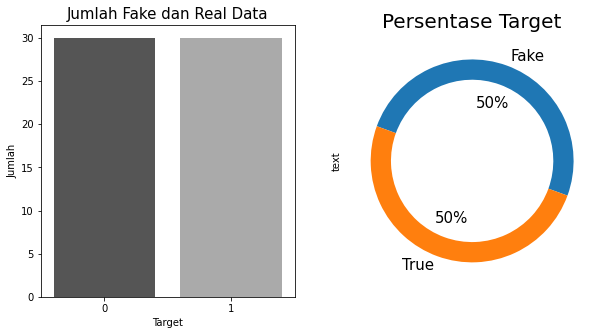

In [ ]:
# Menampilkan fake dan real dari artikel

print(data.groupby(['target'])['text'].count())
fig, ax = plt.subplots(1,2, figsize=(10, 5))
g = sns.countplot(data.target,ax=ax[0],palette="gist_gray");
g.set_title("Jumlah Fake dan Real Data", fontsize=15)
g.set_ylabel("Jumlah")
g.set_xlabel("Target")
plt.title('Persentase Target', fontsize=20)
data.groupby(['target'])['text'].count().plot(kind='pie', labels=['Fake', 'True', 'Unverified'], wedgeprops=dict(width=.2), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})
fig.show()

In [ ]:
# Fungsi kata yang paling sering muncul

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Kata": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Kata", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Jumlah")
    plt.xticks(rotation='vertical')
    plt.show()

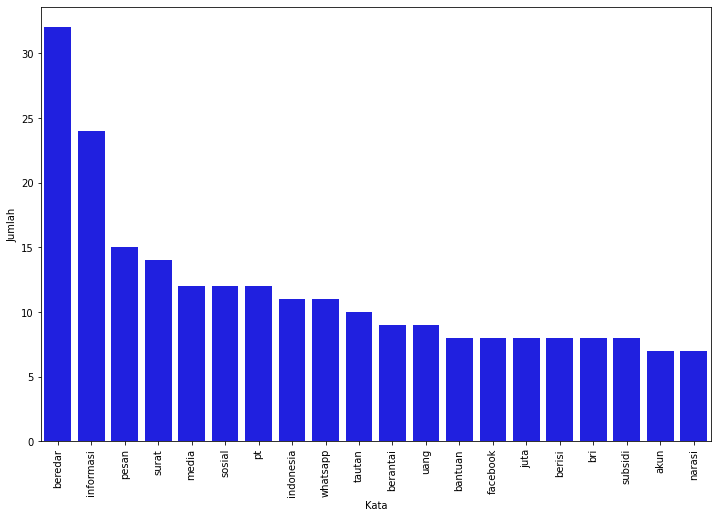

In [ ]:
# Kata-kata yang paling sering muncul dalam Fake News
counter(data[data["target"] == 0], "text", 20)

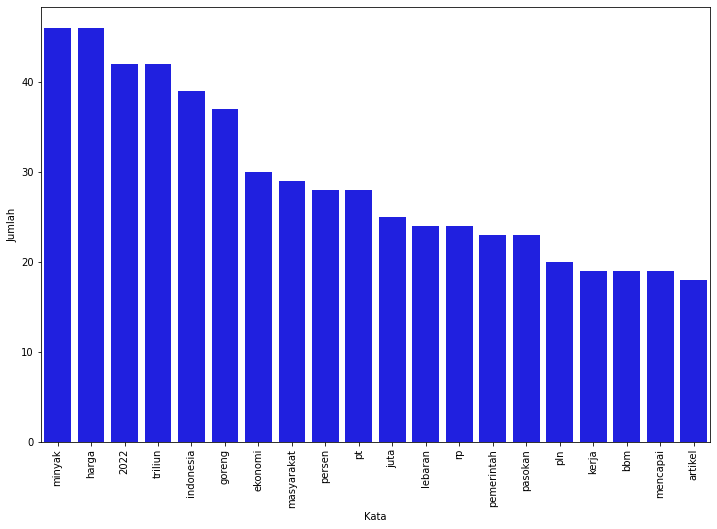

In [ ]:
# Kata-kata yang paling sering muncul dalam Real News
counter(data[data["target"] == 1], "text", 20)

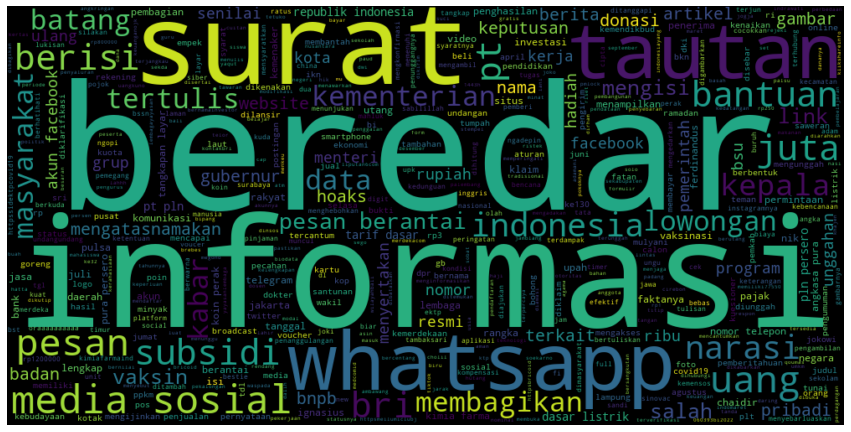

In [ ]:
# Membuat World Cloud untuk Fake News

plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 0].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show()

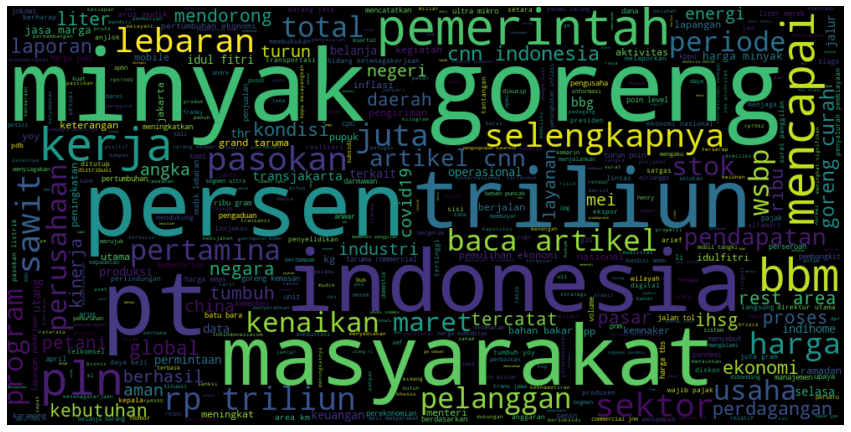

In [ ]:
# Membuat World Cloud untuk Real News

plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 , stopwords = STOPWORDS).generate(" ".join(data[data.target == 1].text))
plt.imshow(wc , interpolation = 'bilinear')
plt.axis("off")
plt.show()

## *N-Gram Analisis*

In [ ]:
texts = ' '.join(data['text'])

string = texts.split(" ")

def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "Kata", 0: "Jumlah"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return sns.barplot(x='Jumlah',y='Kata', data=n_gram_df)

### Unigram Analisis

           Kata  Jumlah
0  (indonesia,)      50
1     (minyak,)      48
2      (harga,)      47
3       (2022,)      46
4    (triliun,)      42


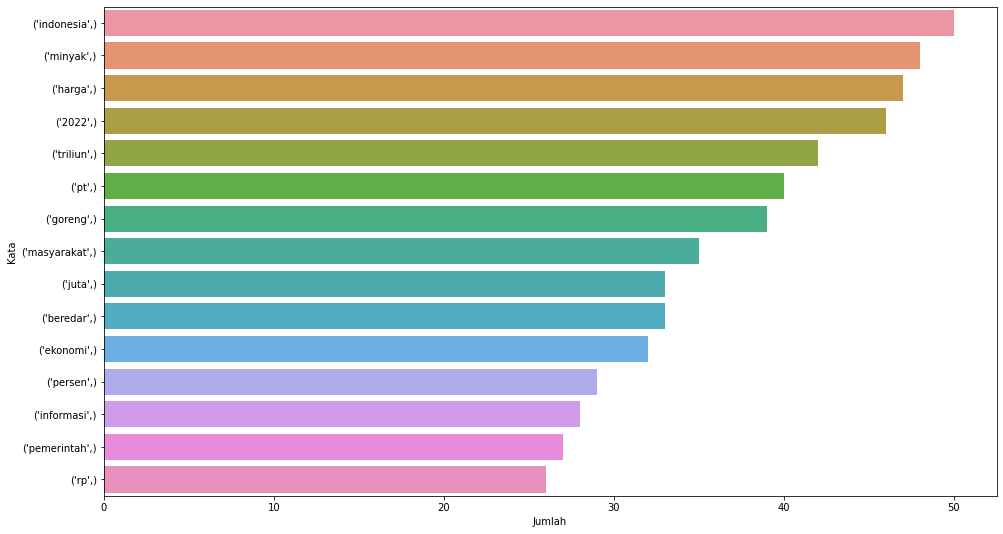

In [ ]:
draw_n_gram(string,1)
plt.show()

### Bigram Analisis

               Kata  Jumlah
0  (minyak, goreng)      38
1   (baca, artikel)      16
2    (artikel, cnn)      13
3  (cnn, indonesia)      13
4   (goreng, curah)      12


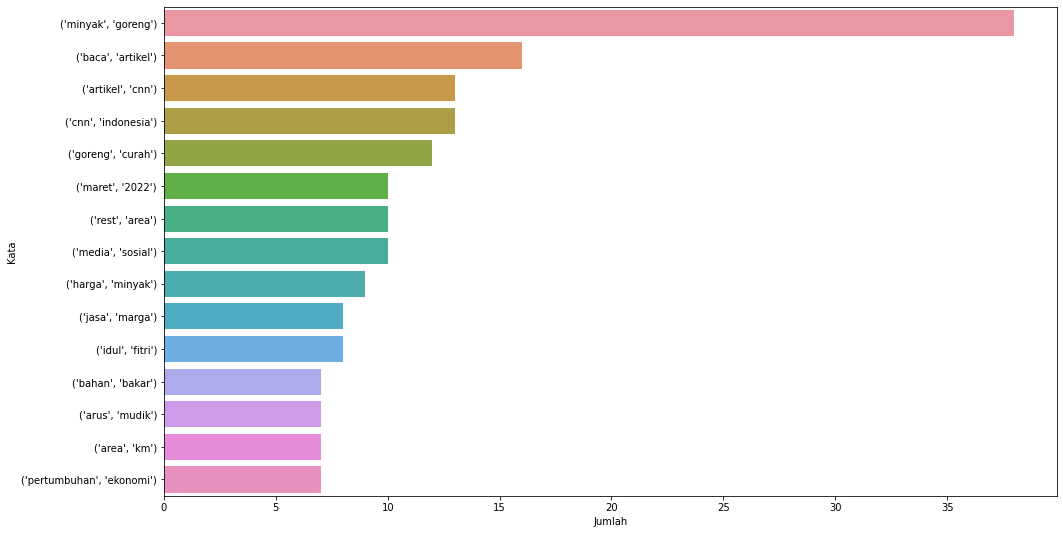

In [ ]:
draw_n_gram(string,2)
plt.show()

### Trigram Analisis

                        Kata  Jumlah
0       (baca, artikel, cnn)      13
1  (artikel, cnn, indonesia)      13
2    (minyak, goreng, curah)      12
3    (harga, minyak, goreng)       8
4           (rest, area, km)       7


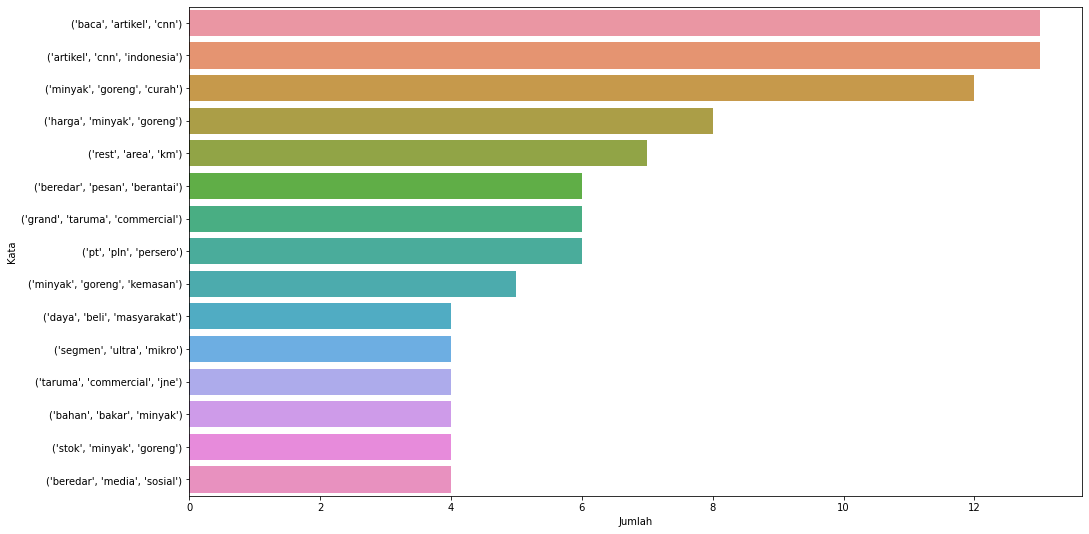

In [ ]:
draw_n_gram(string,3)
plt.show()

## *Pembagian Dataset*

### Membuat fungsi text

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
data["text"] = data["text"].apply(wordopt)

### Split Data

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=0)

In [ ]:
print('Data Train : {shape}'.format(shape=X_train.shape))
print('Data Test : {shape}'.format(shape=X_test.shape))
print('Data Train (target) : {shape}'.format(shape=y_train.shape))
print('Data Test (target) : {shape}'.format(shape=y_test.shape))

Data Train : (48,)
Data Test : (12,)
Data Train (target) : (48,)
Data Test (target) : (12,)


## *Modeling dan Evaluasi*

### **Model dan Evaluasi Machine Learning**

In [ ]:
vectorization = TfidfVectorizer()
Xv_train = vectorization.fit_transform(X_train)
Xv_test = vectorization.transform(X_test)

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(Xv_train,y_train)
pred_lr=LR.predict(Xv_test)
LR.score(Xv_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



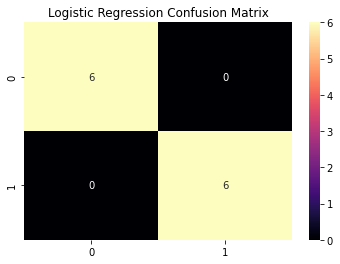

In [ ]:
cm_LR_text = confusion_matrix(pred_lr,y_test)
sns.heatmap(cm_LR_text, annot=True, fmt='d',cmap='magma')
plt.title('Logistic Regression Confusion Matrix');

#### Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(Xv_train, y_train)
pred_dt = DT.predict(Xv_test)
DT.score(Xv_test, y_test)

0.8333333333333334

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



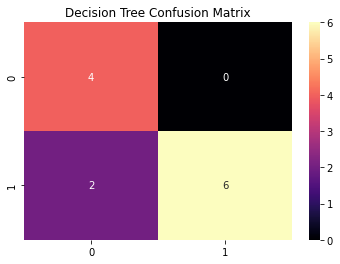

In [ ]:
cm_DT_text = confusion_matrix(pred_dt,y_test)
sns.heatmap(cm_DT_text, annot=True, fmt='d',cmap='magma')
plt.title('Decision Tree Confusion Matrix');

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(Xv_train, y_train)
pred_rfc = RFC.predict(Xv_test)
RFC.score(Xv_test, y_test)

1.0

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



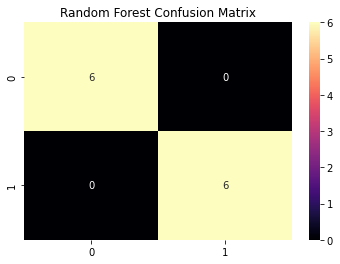

In [ ]:
cm_RFC_text = confusion_matrix(pred_rfc,y_test)
sns.heatmap(cm_RFC_text, annot=True, fmt='d',cmap='magma')
plt.title('Random Forest Confusion Matrix');

#### Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(Xv_train, y_train)
pred_gbc = GBC.predict(Xv_test)
GBC.score(Xv_test, y_test)

0.8333333333333334

In [ ]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



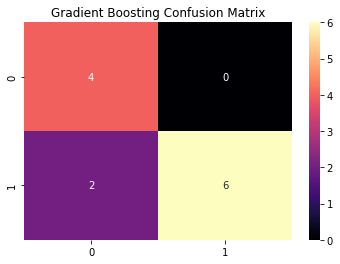

In [ ]:
cm_GBC_text = confusion_matrix(pred_gbc,y_test)
sns.heatmap(cm_GBC_text, annot=True, fmt='d',cmap='magma')
plt.title('Gradient Boosting Confusion Matrix');

#### *Testing Model*

In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Bukan Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_X_test = new_def_test["text"]
    new_Xv_test = vectorization.transform(new_X_test)
    pred_LR = LR.predict(new_Xv_test)
    pred_DT = DT.predict(new_Xv_test)
    pred_GBC = GBC.predict(new_Xv_test)
    pred_RFC = RFC.predict(new_Xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

kebutuhan bbm menjolak 41 persen


LR Prediction: Bukan Fake News 
DT Prediction: Bukan Fake News 
GBC Prediction: Bukan Fake News 
RFC Prediction: Fake News
